In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
esportes_df = pd.read_excel('./data/EntriesGender.xlsx')
atletas_df = pd.read_excel('./data/Athletes.xlsx')
equipes_df = pd.read_excel('./data/Teams.xlsx')
treinadores_df = pd.read_excel('./data/Coaches.xlsx')
medalhas_df = pd.read_excel('./data/Medals.xlsx')

/home/josemng/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 1. Quais os esportes em que competiram mais mulheres do que homens?

In [3]:
# Visão base sobre o DataFrame de esportes

esportes_df.head(8)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288


In [4]:
mais_competidos_por_mulheres = esportes_df.loc[esportes_df['Female'] > esportes_df['Male']][['Discipline', 'Female', 'Male']]
mais_competidos_por_mulheres.sort_values(by='Female', ascending=True)

,Discipline,Female,Male
12,Cycling BMX Freestyle,10,9
17,Diving,72,71
28,Rhythmic Gymnastics,96,0
3,Artistic Swimming,105,0


<font size=4> Temos que <b>BMX Estilo Livre, Saltos Ornamentais (Diving), Nado Artístico e Ginástica Rítmica</b> tiveram mais mulheres competindo do que homens. Os dois primeiros têm apenas 1 competidor de diferença entre os gêneros. Nos dois últimos nenhum homem competiu.</font>

## 2. Quais os esportes em que competiram mais homens do que mulheres?

In [5]:
mais_competidos_por_homens = esportes_df.loc[esportes_df['Male'] > esportes_df['Female']][['Discipline', 'Male', 'Female']]
mais_competidos_por_homens.sort_values(by='Male', ascending=False, inplace=True)
mais_competidos_por_homens

,Discipline,Male,Female
4,Athletics,1072,969
36,Swimming,418,361
20,Football,344,264
29,Rowing,265,257
24,Judo,201,192
45,Wrestling,193,96
9,Boxing,187,102
30,Rugby Sevens,151,146
43,Water Polo,146,122
6,Baseball/Softball,144,90


<font size=4> Temos que <b>Atletismo, Natação, Futebol, Remo, Judô</b> e outros 15 esportes tiveram mais homens competindo do que mulheres. Mas dentre esses, quais possuem maior discrepância entre os gêneros?</font>

In [6]:
mais_competidos_por_homens['Difference'] = abs(mais_competidos_por_homens['Male'] - mais_competidos_por_homens['Female'])
mais_competidos_por_homens.sort_values(by='Difference', ascending=False)[:5]

,Discipline,Male,Female,Difference
4,Athletics,1072,969,103
45,Wrestling,193,96,97
9,Boxing,187,102,85
20,Football,344,264,80
15,Cycling Road,131,70,61


<font size=4> Vemos então que em <b>Atletismo, Luta Profissional, Boxe, Futebol e Ciclismo de Estrada</b> competiram bem mais homens do que mulheres.</font>

## 3. Quais os esportes em que mais competiram atletas (independente do gênero)?

In [7]:
mais_competidos_por_todos = esportes_df[['Discipline', 'Total']].sort_values(by='Total', ascending=False)
mais_competidos_por_todos[:10]

,Discipline,Total
4,Athletics,2041
36,Swimming,779
20,Football,608
29,Rowing,522
24,Judo,393
23,Hockey,384
32,Shooting,356
31,Sailing,350
22,Handball,336
30,Rugby Sevens,297


<font size=4>Concluímos que <b>Atletismo, Natação, Futebol, Remo, Judô, Hóquei, Tiro, Vela, Handebol e Rugby de Sete</b> foram respectivamente os 10 primeiros esportes em que mais atletas competiram. <br><br>Mas em quais competiram MENOS atletas?</font>

In [8]:
menos_competidos_por_todos = mais_competidos_por_todos.sort_values(by='Total', ascending=True)
menos_competidos_por_todos[0:10]

,Discipline,Total
12,Cycling BMX Freestyle,19
40,Trampoline Gymnastics,32
34,Sport Climbing,40
35,Surfing,40
13,Cycling BMX Racing,48
26,Marathon Swimming,50
0,3x3 Basketball,64
27,Modern Pentathlon,72
14,Cycling Mountain Bike,76
33,Skateboarding,80


<font size=4><b>BMX Estilo Livre, Ginástica de Trampolim, Escalada esportiva combinado, Surfe, Ciclismo corrida BMX, Maratona Aquática, Basquete 3x3, Pentatlo moderno individual, Ciclismo cross-country e Skate</b> foram respectivamente os 10 esportes em que menos atletas competiram.</font>

## 4. Quais países ganharam mais medalhas de ouro, prata e bronze, respectivamente?

Para responder esssa pergunta, é mais intuitivo visualizar os dados através de um gráfico.

In [9]:
# Visão geral sobre o DataFrame de medalhas

medalhas_df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [120]:
# Pegando os nomes dos 10 primeiros países com mais medalhas e a quantidade de medalhas de bronze, prata e ouro

# O DataFrame já está ordenado pelos ranks dos países
dez_primeiros = range(9, -1, -1)

paises = medalhas_df['Team/NOC'][dez_primeiros].values
medalhas_bronze = medalhas_df['Bronze'][dez_primeiros].values
medalhas_prata = medalhas_df['Silver'][dez_primeiros].values
medalhas_ouro = medalhas_df['Gold'][dez_primeiros].values

medalhas_bronze, medalhas_prata, medalhas_ouro

(array([20, 16, 11, 14, 22, 23, 22, 17, 18, 33]),
 array([10, 11, 12, 12,  7, 28, 21, 14, 32, 41]),
 array([10, 10, 10, 10, 17, 20, 22, 27, 38, 39]))

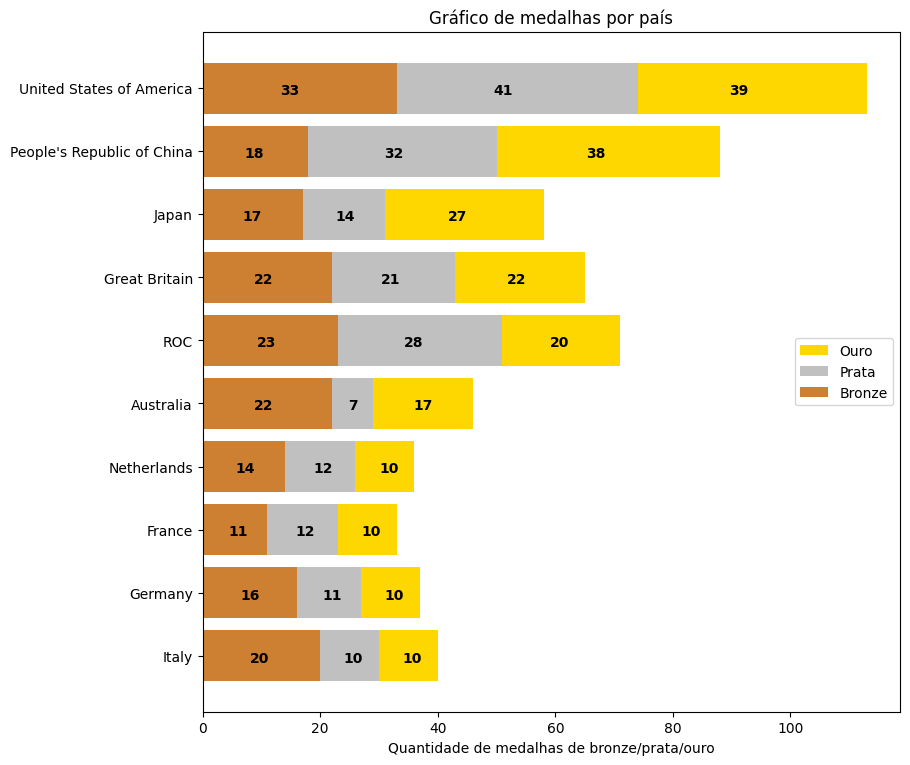

In [129]:
# Criando e exibindo o gráfico

plt.figure(figsize=[9,9], dpi=100)
plt.barh(paises, medalhas_ouro, left = medalhas_bronze + medalhas_prata, color = '#ffd700', label = 'Ouro')
plt.barh(paises, medalhas_prata, left = medalhas_bronze, color = '#c0c0c0', label = 'Prata')
plt.barh(paises, medalhas_bronze, color = '#cd7f32', label = 'Bronze')

# Colocando os valores em cada barra
for i, v in enumerate(medalhas_ouro):
    plt.text(medalhas_bronze[i] + medalhas_prata[i] + v*0.4, i - 0.1, str(v),
            color = 'black', fontweight = 'bold')

for i, v in enumerate(medalhas_prata):
    plt.text(medalhas_bronze[i] + v*0.4, i - 0.1, str(v),
            color = 'black', fontweight = 'bold')

for i, v in enumerate(medalhas_bronze):
    plt.text(v*0.4, i - 0.1, str(v),
    color = 'black', fontweight = 'bold')

# Colocando os títulos e legendas
plt.xlabel('Quantidade de medalhas de bronze/prata/ouro')
plt.title('Gráfico de medalhas por país')
plt.legend(loc = 'center right')
plt.show()